In [268]:
from typing import Tuple, Optional, List
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv
import random
from sklearn.cluster import DBSCAN
import math

from scipy.spatial.distance import euclidean

sys.path.append("..")
import matplotlib
import analysis_package.maxlab_analysis as mla
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

#plt.switch_backend("Qt5Agg")


In [269]:
chip = "M07458"
div = 42
file_path = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/neuronal units ns/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/{chip}/Network/000085/"
file_name = "data.raw.h5"

file_path = "/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/single_unit/M07458 NS/"
file_name = "DIV41.h5"
well_no = 3 #all wells
recording_no = 0

In [270]:
def load_data(
    path: str,
    well_no: int,
    recording_no: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    spikes = mla.load_spikes_from_file(path, well_no, recording_no)
    mapping = mla.load_mapping(path, well_no, recording_no)
    return spikes, mapping


spike_pd_df, mapping_pd_df = load_data(file_path + file_name,
                                        well_no,
                                        recording_no,)

display(spike_pd_df)
display(mapping_pd_df)

,time,channel,amplitude
0,-0.1871,608,-3.741350
1,-0.1856,108,-5.269739
2,-0.1838,196,-4.228743
3,-0.1838,168,-8.876204
4,-0.1833,434,-8.286676
...,...,...,...
212254,599.8663,446,-4.153729
212255,599.8712,326,-9.743088
212256,599.8712,322,-9.219545
212257,599.8712,294,-5.467091


,channel,electrode,x,y
0,0,12133,577.5,962.5
1,2,16531,542.5,1312.5
2,4,13467,822.5,1067.5
3,5,17121,3167.5,1347.5
4,6,14755,262.5,1172.5
...,...,...,...,...
473,1012,4271,1592.5,332.5
474,1013,2989,2257.5,227.5
475,1015,20561,1767.5,1627.5
476,1017,6531,2642.5,507.5


478
478
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

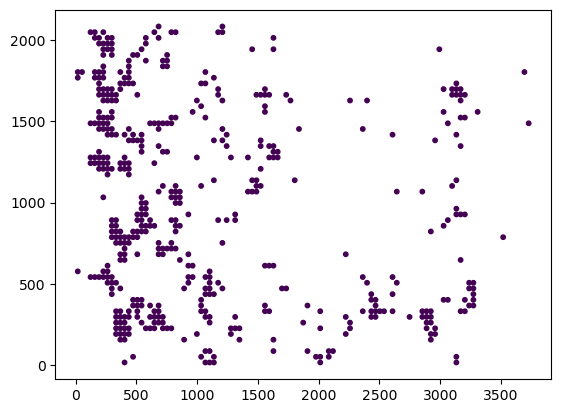

In [271]:
#Cluster points
#17.5 x sqrt(2) = 24.8
clustering = DBSCAN(eps = 25).fit(mapping_pd_df.loc[:, ["x", "y"]])
labels = clustering.labels_
mapping_pd_df["label"] = labels

print(len(mapping_pd_df))
print(len(labels))
print(labels)
print(len(mapping_pd_df.loc[:, "x"]))
plt.scatter(mapping_pd_df.loc[:, "x"], mapping_pd_df.loc[:, "y"],  s = 10, c = labels)
plt.show()



In [272]:
clustering_dict = dict()
for i, chan in enumerate(mapping_pd_df["channel"]):
    clustering_dict[chan] = labels[i]
clustering_dict

{0: -1,
 2: -1,
 4: -1,
 5: -1,
 6: -1,
 8: -1,
 10: -1,
 12: -1,
 14: -1,
 16: -1,
 17: -1,
 18: -1,
 20: -1,
 22: -1,
 23: -1,
 24: -1,
 26: -1,
 28: -1,
 30: -1,
 32: -1,
 34: -1,
 35: -1,
 36: -1,
 37: -1,
 38: -1,
 40: -1,
 42: -1,
 44: -1,
 46: -1,
 48: -1,
 50: -1,
 52: -1,
 54: -1,
 55: -1,
 56: -1,
 58: -1,
 60: -1,
 62: -1,
 64: -1,
 66: -1,
 68: -1,
 70: -1,
 72: -1,
 74: -1,
 76: -1,
 78: -1,
 80: -1,
 82: -1,
 84: -1,
 86: -1,
 88: -1,
 90: -1,
 92: -1,
 94: -1,
 95: -1,
 98: -1,
 99: -1,
 100: -1,
 101: -1,
 102: -1,
 104: -1,
 106: -1,
 107: -1,
 108: -1,
 109: -1,
 110: -1,
 112: -1,
 114: -1,
 116: -1,
 118: -1,
 120: -1,
 121: -1,
 122: -1,
 123: -1,
 124: -1,
 126: -1,
 130: -1,
 132: -1,
 134: -1,
 136: -1,
 138: -1,
 142: -1,
 144: -1,
 146: -1,
 148: -1,
 150: -1,
 152: -1,
 154: -1,
 156: -1,
 158: -1,
 160: -1,
 162: -1,
 166: -1,
 168: -1,
 170: -1,
 172: -1,
 174: -1,
 176: -1,
 178: -1,
 180: -1,
 182: -1,
 184: -1,
 186: -1,
 188: -1,
 190: -1,
 192: -1,
 19

In [273]:
mapping_pd_df_channel_replaced = mapping_pd_df.drop(["channel"], axis = 1).rename(columns = {"label": "channel"})
mapping_pd_df_channel_replaced = mapping_pd_df_channel_replaced.groupby("channel").mean().reset_index()
spike_pd_df_channel_replaced = spike_pd_df.copy()
spike_pd_df_channel_replaced["original channel"] = spike_pd_df_channel_replaced["channel"]
spike_pd_df_channel_replaced["channel"] = spike_pd_df_channel_replaced["channel"].replace(clustering_dict)


In [274]:
display(mapping_pd_df_channel_replaced)
display(spike_pd_df_channel_replaced)

,channel,electrode,x,y
0,-1,12463.029289,1133.76569,986.223849


,time,channel,amplitude,original channel
0,-0.1871,-1,-3.741350,608
1,-0.1856,-1,-5.269739,108
2,-0.1838,-1,-4.228743,196
3,-0.1838,-1,-8.876204,168
4,-0.1833,-1,-8.286676,434
...,...,...,...,...
212254,599.8663,-1,-4.153729,446
212255,599.8712,-1,-9.743088,326
212256,599.8712,-1,-9.219545,322
212257,599.8712,-1,-5.467091,294


In [275]:
binned_df, spike_binned_data_df, times = mla.bin_spike_data(spike_df=spike_pd_df_channel_replaced,
                                                 mapping=mapping_pd_df_channel_replaced,
                                                 bin_size=0.001,
                                                 mode='binary')

binned_df, spike_binned_data_df, times = mla.bin_spike_data(spike_df=spike_pd_df,
                                                 mapping=mapping_pd_df,
                                                 bin_size=0.001,
                                                 mode='binary')
print(binned_df)
print(binned_df.shape)
print(spike_binned_data_df)
print(spike_binned_data_df.shape)

        0     2     4     5     6     8     10    12    14    16    ...  1004  \
0          0     0     0     0     0     0     0     0     0     0  ...     0   
1          0     0     0     0     0     0     0     0     0     0  ...     0   
2          0     0     0     0     0     0     0     0     0     0  ...     0   
3          0     0     0     0     0     0     0     0     0     0  ...     0   
4          0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
600055     0     0     0     0     0     0     0     0     0     0  ...     0   
600056     0     0     0     0     0     0     0     0     0     0  ...     0   
600057     0     0     0     0     0     0     0     0     0     0  ...     0   
600058     0     0     0     0     0     0     0     0     0     0  ...     0   
600059     0     0     0     0     0     0     0     0     0     0  ...     0   

        1005  1008  1009  1

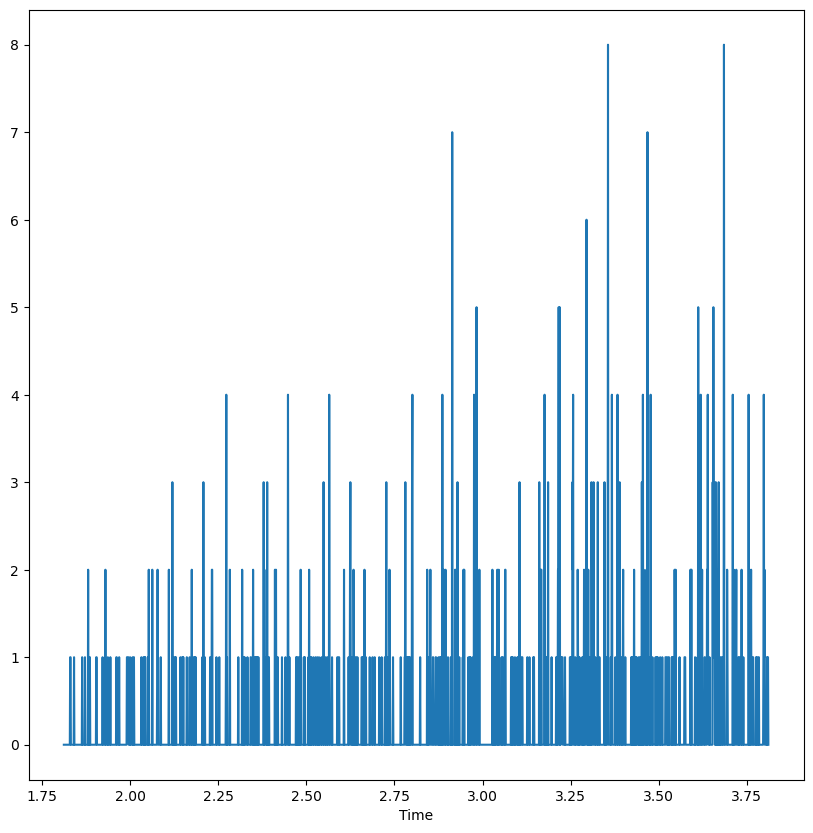

In [276]:
plt.figure(figsize = (10, 10))
plt.plot(times[2000:4000], binned_df[2000:4000].sum(axis = 1))
plt.xlabel("Time")
plt.show()

[[0.00099751 0.00149626 0.00099751 ... 0.         0.00249377 0.00199501]
 [0.00448878 0.00498753 0.00598504 ... 0.00897756 0.00698254 0.00548628]
 [0.00049875 0.         0.00049875 ... 0.00099751 0.00099751 0.00049875]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00149626 0.00199501 0.00099751 ... 0.00049875 0.00099751 0.00149626]
 [0.00049875 0.00049875 0.00099751 ... 0.00049875 0.00099751 0.00149626]]
(478, 21)


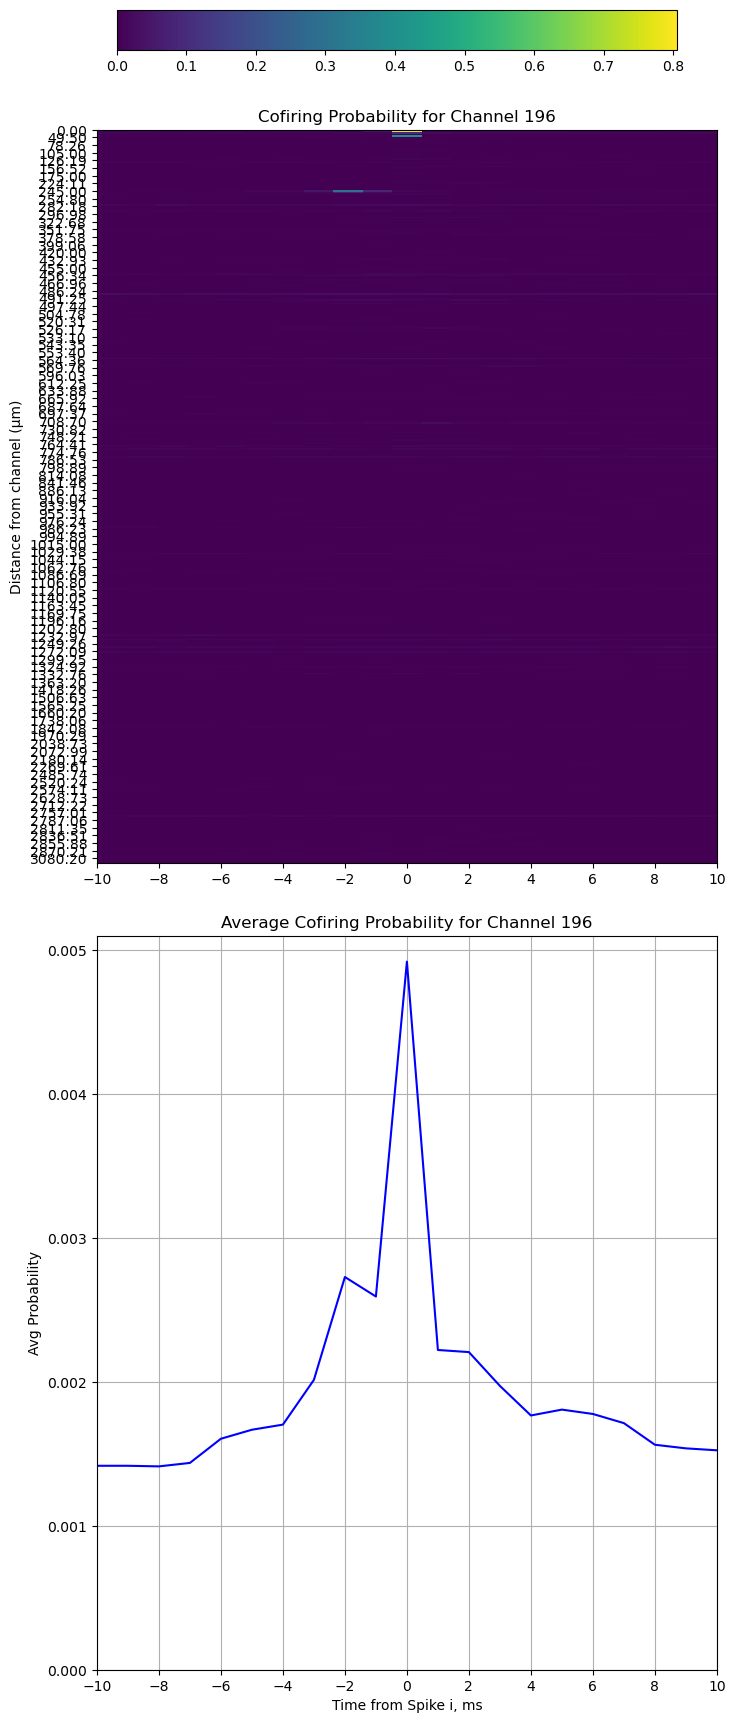

In [277]:
def cofiring_probability(
    df: pd.DataFrame,
    channel_id: int,
    pre_win: int,
    post_win: int) -> np.ndarray:
    
    if channel_id not in df.columns:
        raise ValueError(f"Channel {channel_id} not found in DataFrame columns.")
    
    spike_bin = df.to_numpy()
    num_time_bins, num_chan = spike_bin.shape

    i = df.columns.get_loc(channel_id)

    total_dur = pre_win + post_win + 1
    allall = np.nan * np.ones((num_chan, total_dur))

    wherei = np.where(spike_bin[:, i] == 1)[0]

    if len(wherei) == 0:
        return allall

    for j in range(num_chan):
        wins = np.zeros((len(wherei), total_dur))

        if j == i:
            allall[j, :] = np.sum(wins, axis=0) / len(wherei)
            continue
        
        for x, spike_time in enumerate(wherei):
            start_index = max(spike_time - pre_win, 0)
            end_index = min(spike_time + post_win + 1, num_time_bins)
            window_size = end_index - start_index
            wins[x, :window_size] = spike_bin[start_index:end_index, j]
        allall[j, :] = np.sum(wins, axis=0) / len(wherei)

    return allall

def plot_cofiring_probability(
    df: pd.DataFrame,
    channel_id: int,
    pre_win: int,
    post_win: int,
    mapping: pd.DataFrame, sort_by_distance = False) -> None:
    
    allall = cofiring_probability(df, channel_id, pre_win, post_win)
    print(allall)
    print(allall.shape)

    if sort_by_distance:
            
        all_channel_nums = list(df.columns)
        channel_positions = mapping.set_index('channel')[['x', 'y']].to_dict('index')
        channel_location = channel_positions[channel_id]['x'], channel_positions[channel_id]['y']

        all_channel_distances = {chan: euclidean((channel_positions[chan]['x'], channel_positions[chan]['y']), channel_location) for chan in all_channel_nums}

        sorted_channels = sorted(all_channel_distances, key=all_channel_distances.get)
        sorted_distances = [all_channel_distances[chan] for chan in sorted_channels]
        
        sorted_indices = [all_channel_nums.index(chan) for chan in sorted_channels]

        allall = allall[sorted_indices, :]


    time_bins = np.arange(-pre_win, post_win + 1) * int(1000 * 0.001)
    average_probability = np.mean(allall, axis=0)

    plt.figure(figsize=(8, 20), dpi=100)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.1)

    ax0 = plt.subplot(gs[0])
    cax = ax0.imshow(allall, aspect='auto', cmap='viridis', extent=[time_bins[0], time_bins[-1], allall.shape[0], 0], interpolation='none')
    cbaxes = plt.gcf().add_axes([0.15, 0.92, 0.7, 0.02])

    if sort_by_distance:
        y_ticks = np.arange(0, len(sorted_distances), 5)
        y_labels = [f"{sorted_distances[i]:.2f}" for i in y_ticks]
        ax0.set_yticks(y_ticks, y_labels)

        
    plt.colorbar(cax, cax=cbaxes, orientation='horizontal', label='')
    ax0.set_xticks([])
    ax0.set_ylabel('Channel j')

    if sort_by_distance:
        ax0.set_ylabel(f'Distance from channel (μm)')



    ax0.set_title(f'Cofiring Probability for Channel {channel_id}')
    #ax0.invert_yaxis()

    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.plot(time_bins, average_probability, 'b-')
    ax1.set_ylabel('Avg Probability')
    ax1.set_xlabel('Time from Spike i, ms')
    ax1.set_title(f'Average Cofiring Probability for Channel {channel_id}')
    slice_step = max(1, len(time_bins)//10)
    ax1.set_xticks(time_bins[::slice_step])
    ax1.set_ylim(0, ax1.get_ylim()[1])
    ax1.grid(True)

    #plt.show()
    #plt.clf()

channel = random.randint(0, max(binned_df.columns))
channel = random.choice(list(binned_df.columns))
pre_win = 10
post_win = 10

plot_cofiring_probability(binned_df, channel, pre_win, post_win, mapping_pd_df, True)

-3.8561473120878915
2.5325541250089803
-5.328210934972499
1.190449199376509
1.308699894910671
-10.39286395726006
0.8826133464988027
1.9436353499503678
-3.6593208666631343
0.5073296951449004
-3.1296163926614238
-0.4491219008264477
-4.5871832730043804
7.046375266524518
4.777777777777778
-1.825817391765142
1.6523403115312445
1.2114398578365333
-1.1092355205821347
0.4748498082422514
-1.8750000000000004
-0.03773693389807981
-0.587862743101517
1.0531858312945392
-7.833811333257396
-1.4990120544672008
-1.660501167671962
-4.053600177014107
0.4054685839767655
-3.1465321920825744
2.6003601144234643
-3.3657594818459255
1.2582895375588308
-3.1779325650418544
1.4905525816790564
-4.588990066225169
-0.8885328450446328
-1.1617985721962085
0.03338813986627295
-0.2021246439804078
4.339438080422379
0.7829990633982506
0.06401280683030887
1.519500676048821
-0.0904461822378844
-1.1618030648842514
-0.30973674266280565
-3.8633974453090634
-0.8022194016958448
-2.6628924115270167
2.034904380410904
-0.8376729165

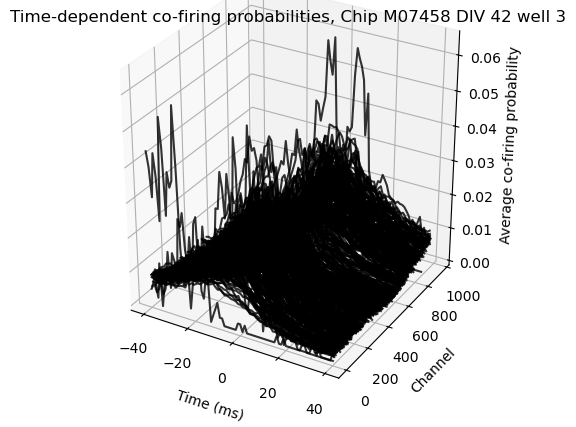

In [278]:
fig = plt.figure()
pre_win = 40
post_win = 40
time_bins = np.arange(-pre_win, post_win + 1)

cmap = matplotlib.colormaps['grey']

colors = cmap(np.linspace(0, 1, len(binned_df.columns)))

scale_x = 1
scale_y = 1
scale_z = 1.5
all_cofiring_probs = np.zeros(shape = (max(binned_df.columns), len(time_bins)))

avg_times = np.zeros(len(binned_df.columns))
integrated_times = np.zeros(len(binned_df.columns))
avg_probabilities =np.zeros(shape = (len(binned_df.columns), len(time_bins)))

for i, channel in enumerate(binned_df.columns):
    cofiring = cofiring_probability(binned_df, channel, pre_win, post_win)
    
    average_probability = np.mean(cofiring, axis=0)
    avg_probabilities[i] = average_probability
    integrated_time = np.dot(average_probability, time_bins)

    average_time = integrated_time/sum(average_probability)
    print(average_time)
    integrated_times[i] = integrated_time
    avg_times[i] = average_time
ax = fig.add_subplot(projection = '3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1]))


for i, average_prob in enumerate(avg_probabilities[np.argsort(integrated_times)]):
    ax.plot(time_bins, [2 *i] * len(time_bins), average_prob, c = "k", alpha = 0.8)

plt.title(f"Time-dependent co-firing probabilities, Chip {chip} DIV {div} well {well_no}")
ax.set_ylabel("Channel")
ax.set_zlabel("Average co-firing probability")
ax.set_xlabel("Time (ms)")

plt.show()



In [279]:
channel_to_integrated_metric = dict()
for i, chan in enumerate(list(binned_df.columns)):
    channel_to_integrated_metric[chan] = integrated_times[i]

In [280]:
mapping_pd_df

,channel,electrode,x,y,label
0,0,12133,577.5,962.5,-1
1,2,16531,542.5,1312.5,-1
2,4,13467,822.5,1067.5,-1
3,5,17121,3167.5,1347.5,-1
4,6,14755,262.5,1172.5,-1
...,...,...,...,...,...
473,1012,4271,1592.5,332.5,-1
474,1013,2989,2257.5,227.5,-1
475,1015,20561,1767.5,1627.5,-1
476,1017,6531,2642.5,507.5,-1


478
478
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

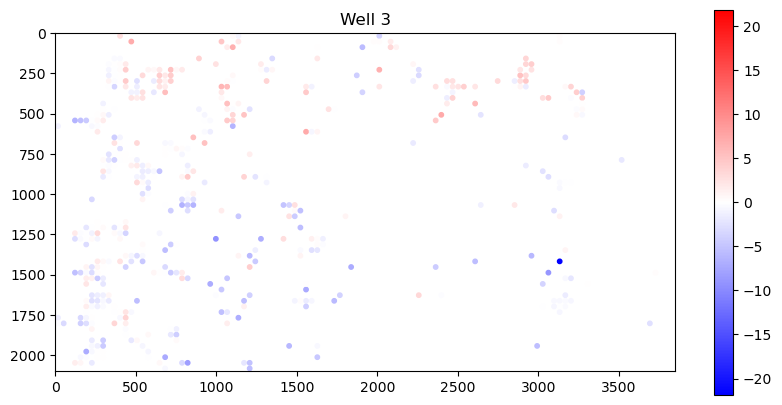

In [281]:
colors = [channel_to_integrated_metric[i] for i in mapping_pd_df["channel"]]


print(len(mapping_pd_df))
print(len(labels))
print(labels)
print(len(mapping_pd_df.loc[:, "x"]))
color_range = max(max(colors), np.abs(min(colors)))

plt.figure(figsize = [10, 5])
plt.scatter(mapping_pd_df.loc[:, "x"], mapping_pd_df.loc[:, "y"],  s = 10, c = colors, cmap = "bwr", vmin = -color_range, vmax = color_range)

plt.xlim([0, 3850])
plt.ylim([2100, 0])
plt.gca().set_aspect('equal', 'box')
plt.colorbar()
plt.title(f"Well {well_no}")
plt.show()

In [282]:
binned_df.columns

Index([   0,    2,    4,    5,    6,    8,   10,   12,   14,   16,
       ...
       1004, 1005, 1008, 1009, 1010, 1012, 1013, 1015, 1017, 1022],
      dtype='int32', length=478)

# Process annotated spikes

In [283]:
spike_pd_df_channel_replaced

,time,channel,amplitude,original channel
0,-0.1871,-1,-3.741350,608
1,-0.1856,-1,-5.269739,108
2,-0.1838,-1,-4.228743,196
3,-0.1838,-1,-8.876204,168
4,-0.1833,-1,-8.286676,434
...,...,...,...,...
212254,599.8663,-1,-4.153729,446
212255,599.8712,-1,-9.743088,326
212256,599.8712,-1,-9.219545,322
212257,599.8712,-1,-5.467091,294


(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)
(50, 478)


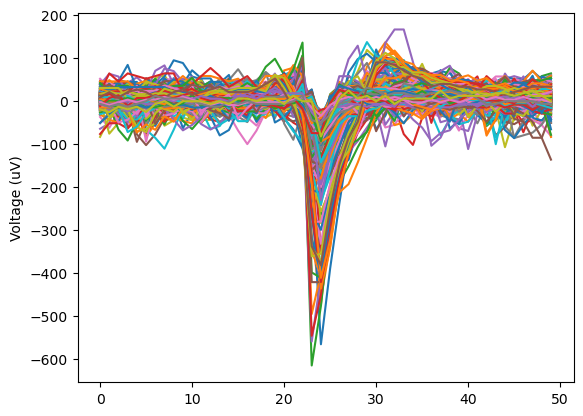

In [284]:
group_of_interest = 30
frames = 50
#get channel dict
_, _, channels = mla.load_from_file_by_frames(file_path + file_name, 0, 1, well_no = well_no)
channel_num_to_index_dict = dict()
for i, channel in enumerate(channels):
    channel_num_to_index_dict[channel] = i
for i in spike_pd_df_channel_replaced.index[4500:5010]:
    time = spike_pd_df_channel_replaced.loc[i, "time"]
    channel_group = spike_pd_df_channel_replaced.loc[i, "channel"]
    original_channel = spike_pd_df_channel_replaced.loc[i, "original channel"]
    if time < 0 and channel_group != group_of_interest:
        continue
    else:
        arr, times, channels = mla.load_from_file_by_frames(file_path + file_name, int(time * 10000 - frames/2), frames, well_no = well_no)
        print(np.shape(arr))
        try:
            plt.plot((arr[:, channel_num_to_index_dict[original_channel]] - np.mean(arr[:, channel_num_to_index_dict[original_channel]])) * 10**6)
            
        except KeyError:
            continue
plt.ylabel("Voltage (uV)")
plt.show()